# Housing Prices Prediction


## Data Preprocessing


### Import Libraries

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Load the data

In [256]:
Housing_Data = pd.read_csv("housing.csv")

### EDA

#### Describe the data

In [257]:
Housing_Data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [258]:
Housing_Data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [259]:
Housing_Data.shape

(20640, 10)

In [260]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [261]:
Housing_Data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [262]:
Housing_Data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

#### Visualize the data

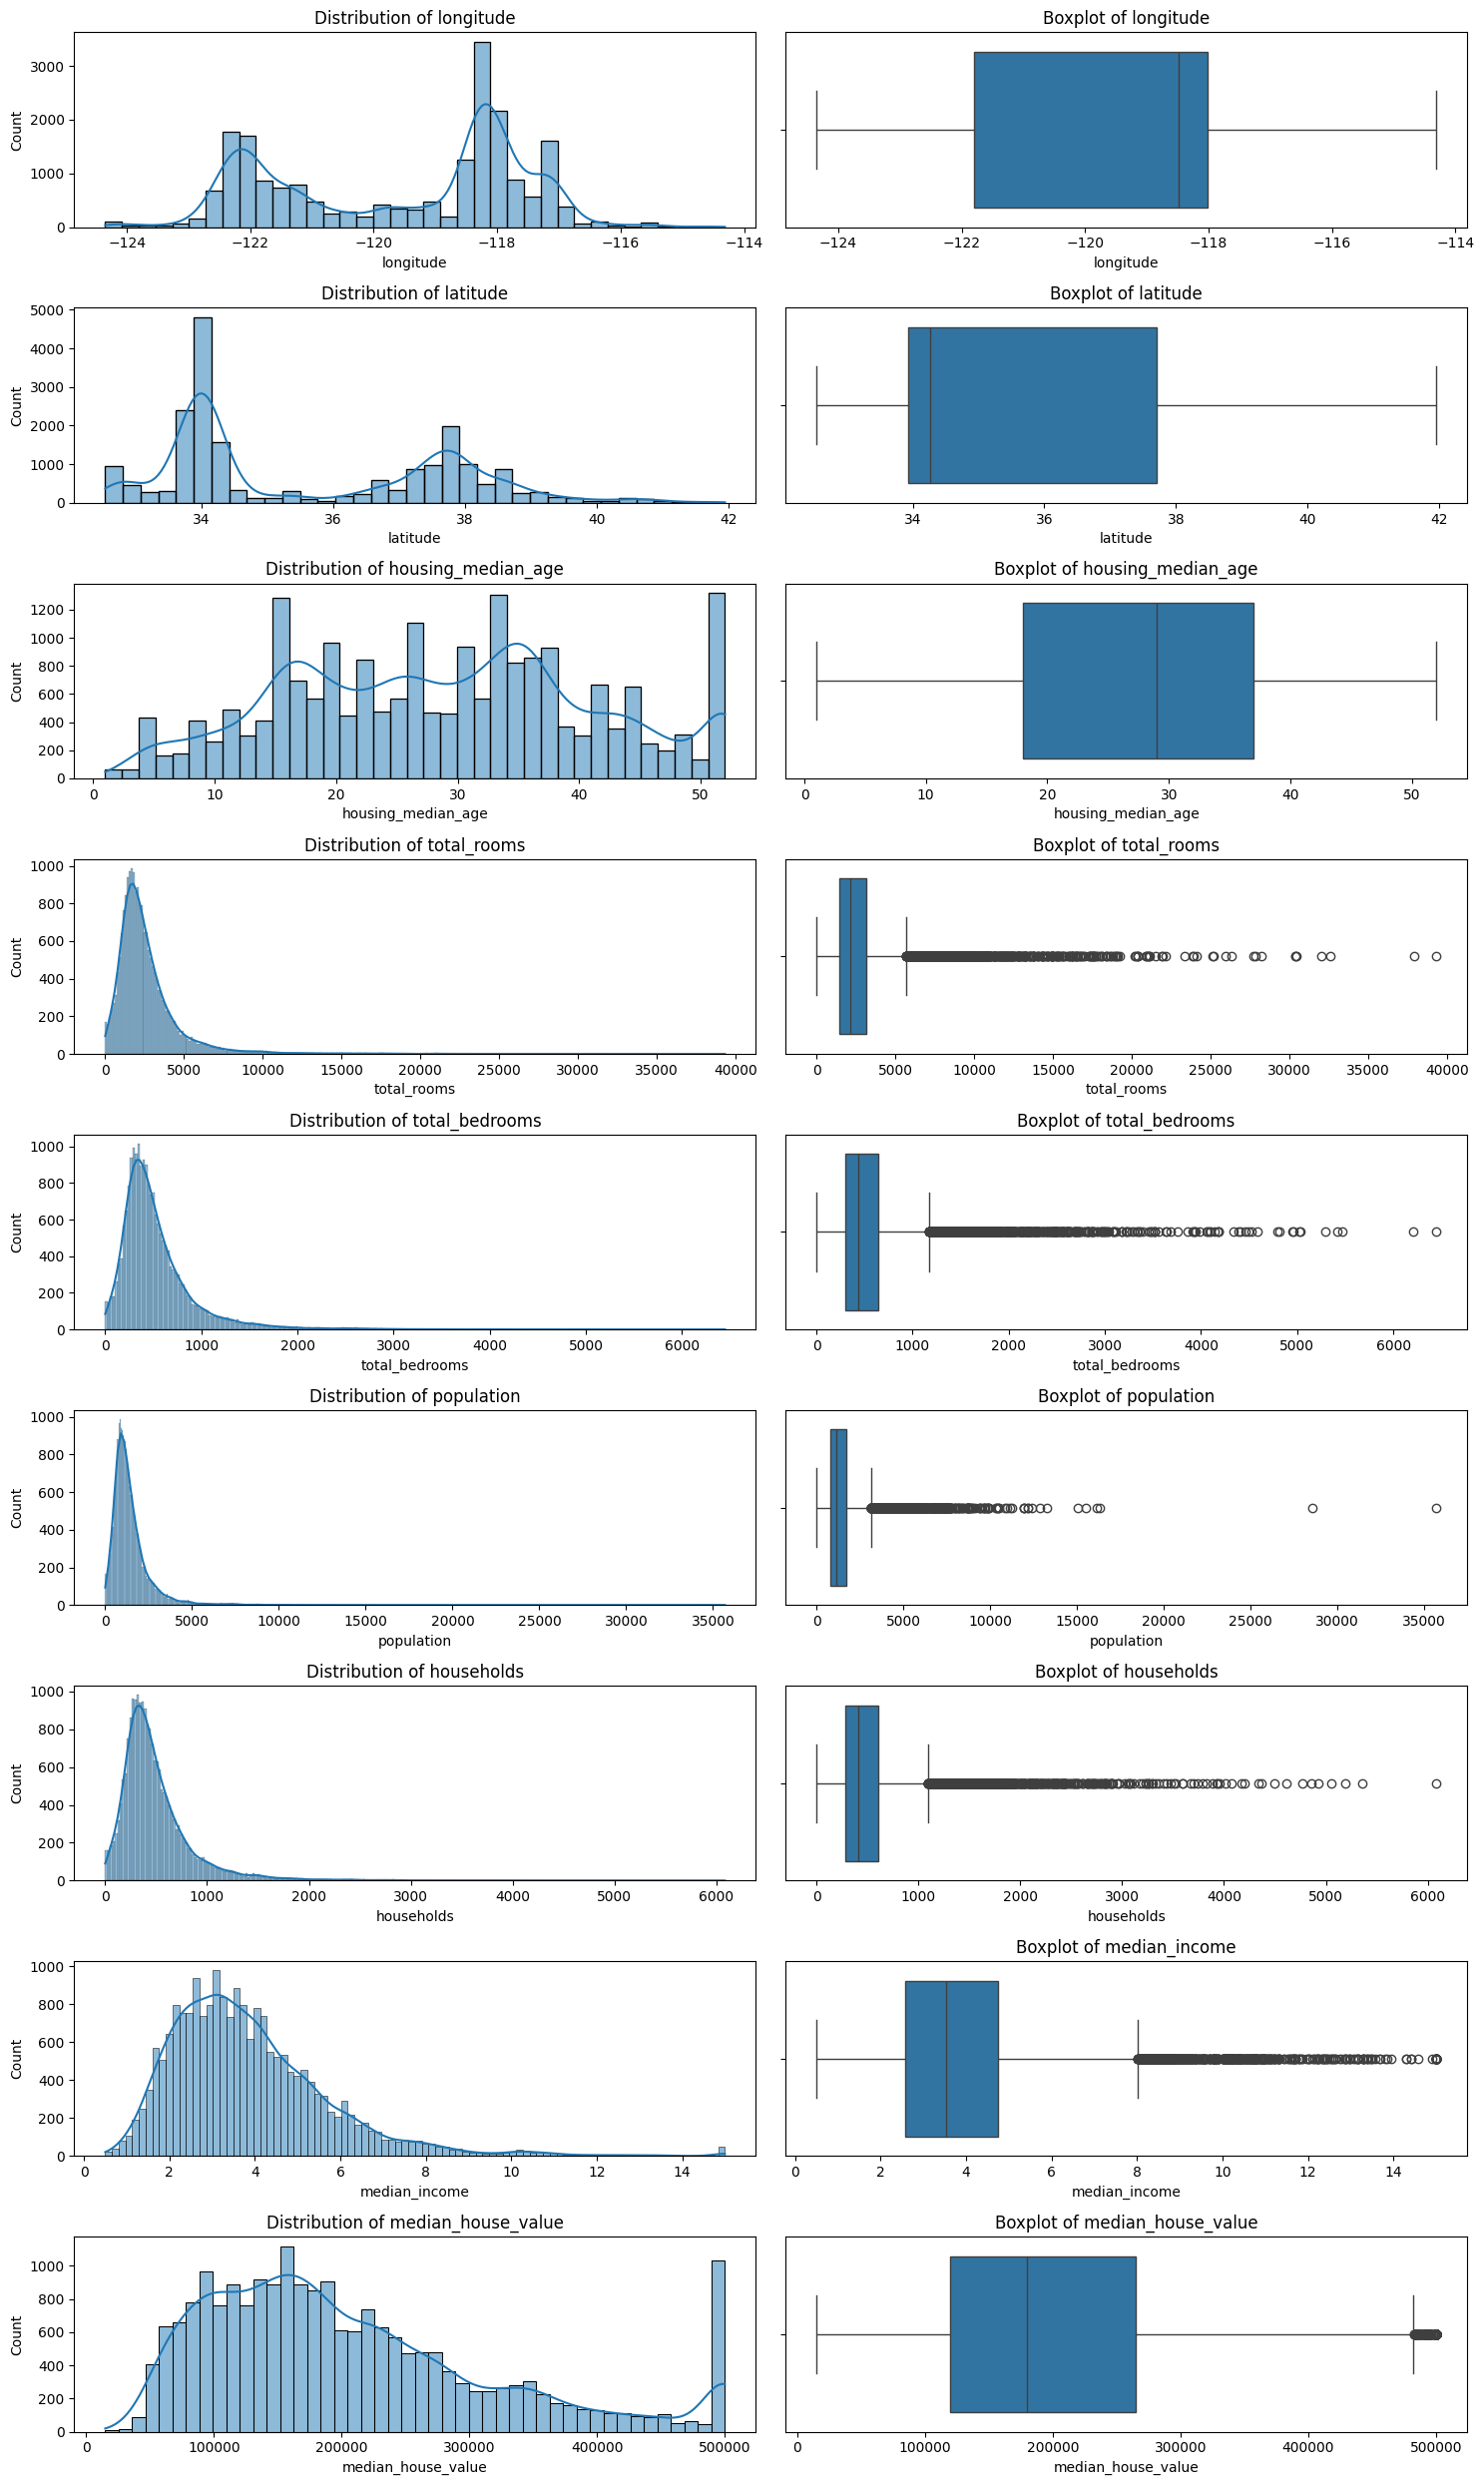

In [263]:
fig, axes = plt.subplots(9, 2, figsize=(15, 25))

# first feature
sns.histplot(Housing_Data['longitude'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of longitude')
sns.boxplot(x=Housing_Data['longitude'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of longitude')

# Second feature
sns.histplot(Housing_Data['latitude'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of latitude')
sns.boxplot(x=Housing_Data['latitude'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of latitude')

# Third feature
sns.histplot(Housing_Data['housing_median_age'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of housing_median_age')
sns.boxplot(x=Housing_Data['housing_median_age'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot of housing_median_age')

# Fourth feature
sns.histplot(Housing_Data['total_rooms'], kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Distribution of total_rooms')
sns.boxplot(x=Housing_Data['total_rooms'], ax=axes[3, 1])
axes[3, 1].set_title('Boxplot of total_rooms')

# Fifth feature
sns.histplot(Housing_Data['total_bedrooms'], kde=True, ax=axes[4, 0])
axes[4, 0].set_title('Distribution of total_bedrooms')
sns.boxplot(x=Housing_Data['total_bedrooms'], ax=axes[4, 1])
axes[4, 1].set_title('Boxplot of total_bedrooms')

# Sixth feature
sns.histplot(Housing_Data['population'], kde=True, ax=axes[5, 0])
axes[5, 0].set_title('Distribution of population')
sns.boxplot(x=Housing_Data['population'], ax=axes[5, 1])
axes[5, 1].set_title('Boxplot of population')

# Seventh feature
sns.histplot(Housing_Data['households'], kde=True, ax=axes[6, 0])
axes[6, 0].set_title('Distribution of households')
sns.boxplot(x=Housing_Data['households'], ax=axes[6, 1])
axes[6, 1].set_title('Boxplot of households')

# Eighth feature
sns.histplot(Housing_Data['median_income'], kde=True, ax=axes[7, 0])
sns.boxplot(x=Housing_Data['median_income'], ax=axes[7, 1])
axes[7, 1].set_title('Boxplot of median_income')

# Target
sns.histplot(Housing_Data['median_house_value'], kde=True, ax=axes[8, 0])
axes[8, 0].set_title('Distribution of median_house_value')
sns.boxplot(x=Housing_Data['median_house_value'], ax=axes[8, 1])
axes[8, 1].set_title('Boxplot of median_house_value')

plt.tight_layout() #is a function used to automatically adjust the spacing of subplots in a figure to prevent overlapping content.
plt.show()

### Cleaning the data

#### Removing Outliers

In [264]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_total_rooms = Housing_Data['total_rooms'].quantile(0.25)
Q3_total_rooms = Housing_Data['total_rooms'].quantile(0.75)
IQR_total_rooms = Q3_total_rooms - Q1_total_rooms

Q1_total_bedrooms = Housing_Data['total_bedrooms'].quantile(0.25)
Q3_total_bedrooms = Housing_Data['total_bedrooms'].quantile(0.75)
IQR_total_bedrooms = Q3_total_bedrooms - Q1_total_bedrooms

Q1_population = Housing_Data['population'].quantile(0.25)
Q3_population = Housing_Data['population'].quantile(0.75)
IQR_population = Q3_population - Q1_population

Q1_households = Housing_Data['households'].quantile(0.25)
Q3_households = Housing_Data['households'].quantile(0.75)
IQR_households = Q3_households - Q1_households

Q1_median_income = Housing_Data['median_income'].quantile(0.25)
Q3_median_income = Housing_Data['median_income'].quantile(0.75)
IQR_median_income = Q3_median_income - Q1_median_income

lower_bound_total_rooms = Q1_total_rooms - 1.5 * IQR_total_rooms
upper_bound_total_rooms = Q3_total_rooms + 1.5 * IQR_total_rooms

lower_bound_total_bedrooms = Q1_total_bedrooms - 1.5 * IQR_total_bedrooms
upper_bound_total_bedrooms = Q3_total_bedrooms + 1.5 * IQR_total_bedrooms

lower_bound_population = Q1_population - 1.5 * IQR_population
upper_bound_population = Q3_population + 1.5 * IQR_population

lower_bound_households = Q1_households - 1.5 * IQR_households
upper_bound_households = Q3_households + 1.5 * IQR_households

lower_bound_median_income = Q1_median_income - 1.5 * IQR_median_income
upper_bound_median_income = Q3_median_income + 1.5 * IQR_median_income
# Remove outliers
Housing_Data_no_outliers = Housing_Data[(Housing_Data['total_rooms'] >= lower_bound_total_rooms) & (Housing_Data['total_rooms'] <= upper_bound_total_rooms) &
                    (Housing_Data['total_bedrooms'] >= lower_bound_total_bedrooms) & (Housing_Data['total_bedrooms'] <= upper_bound_total_bedrooms) &
                    (Housing_Data['population'] >= lower_bound_population) & (Housing_Data['population'] <= upper_bound_population) &
                    (Housing_Data['households'] >= lower_bound_households) & (Housing_Data['households'] <= upper_bound_households) &
                    (Housing_Data['median_income'] >= lower_bound_median_income) & (Housing_Data['median_income'] <= upper_bound_median_income)]

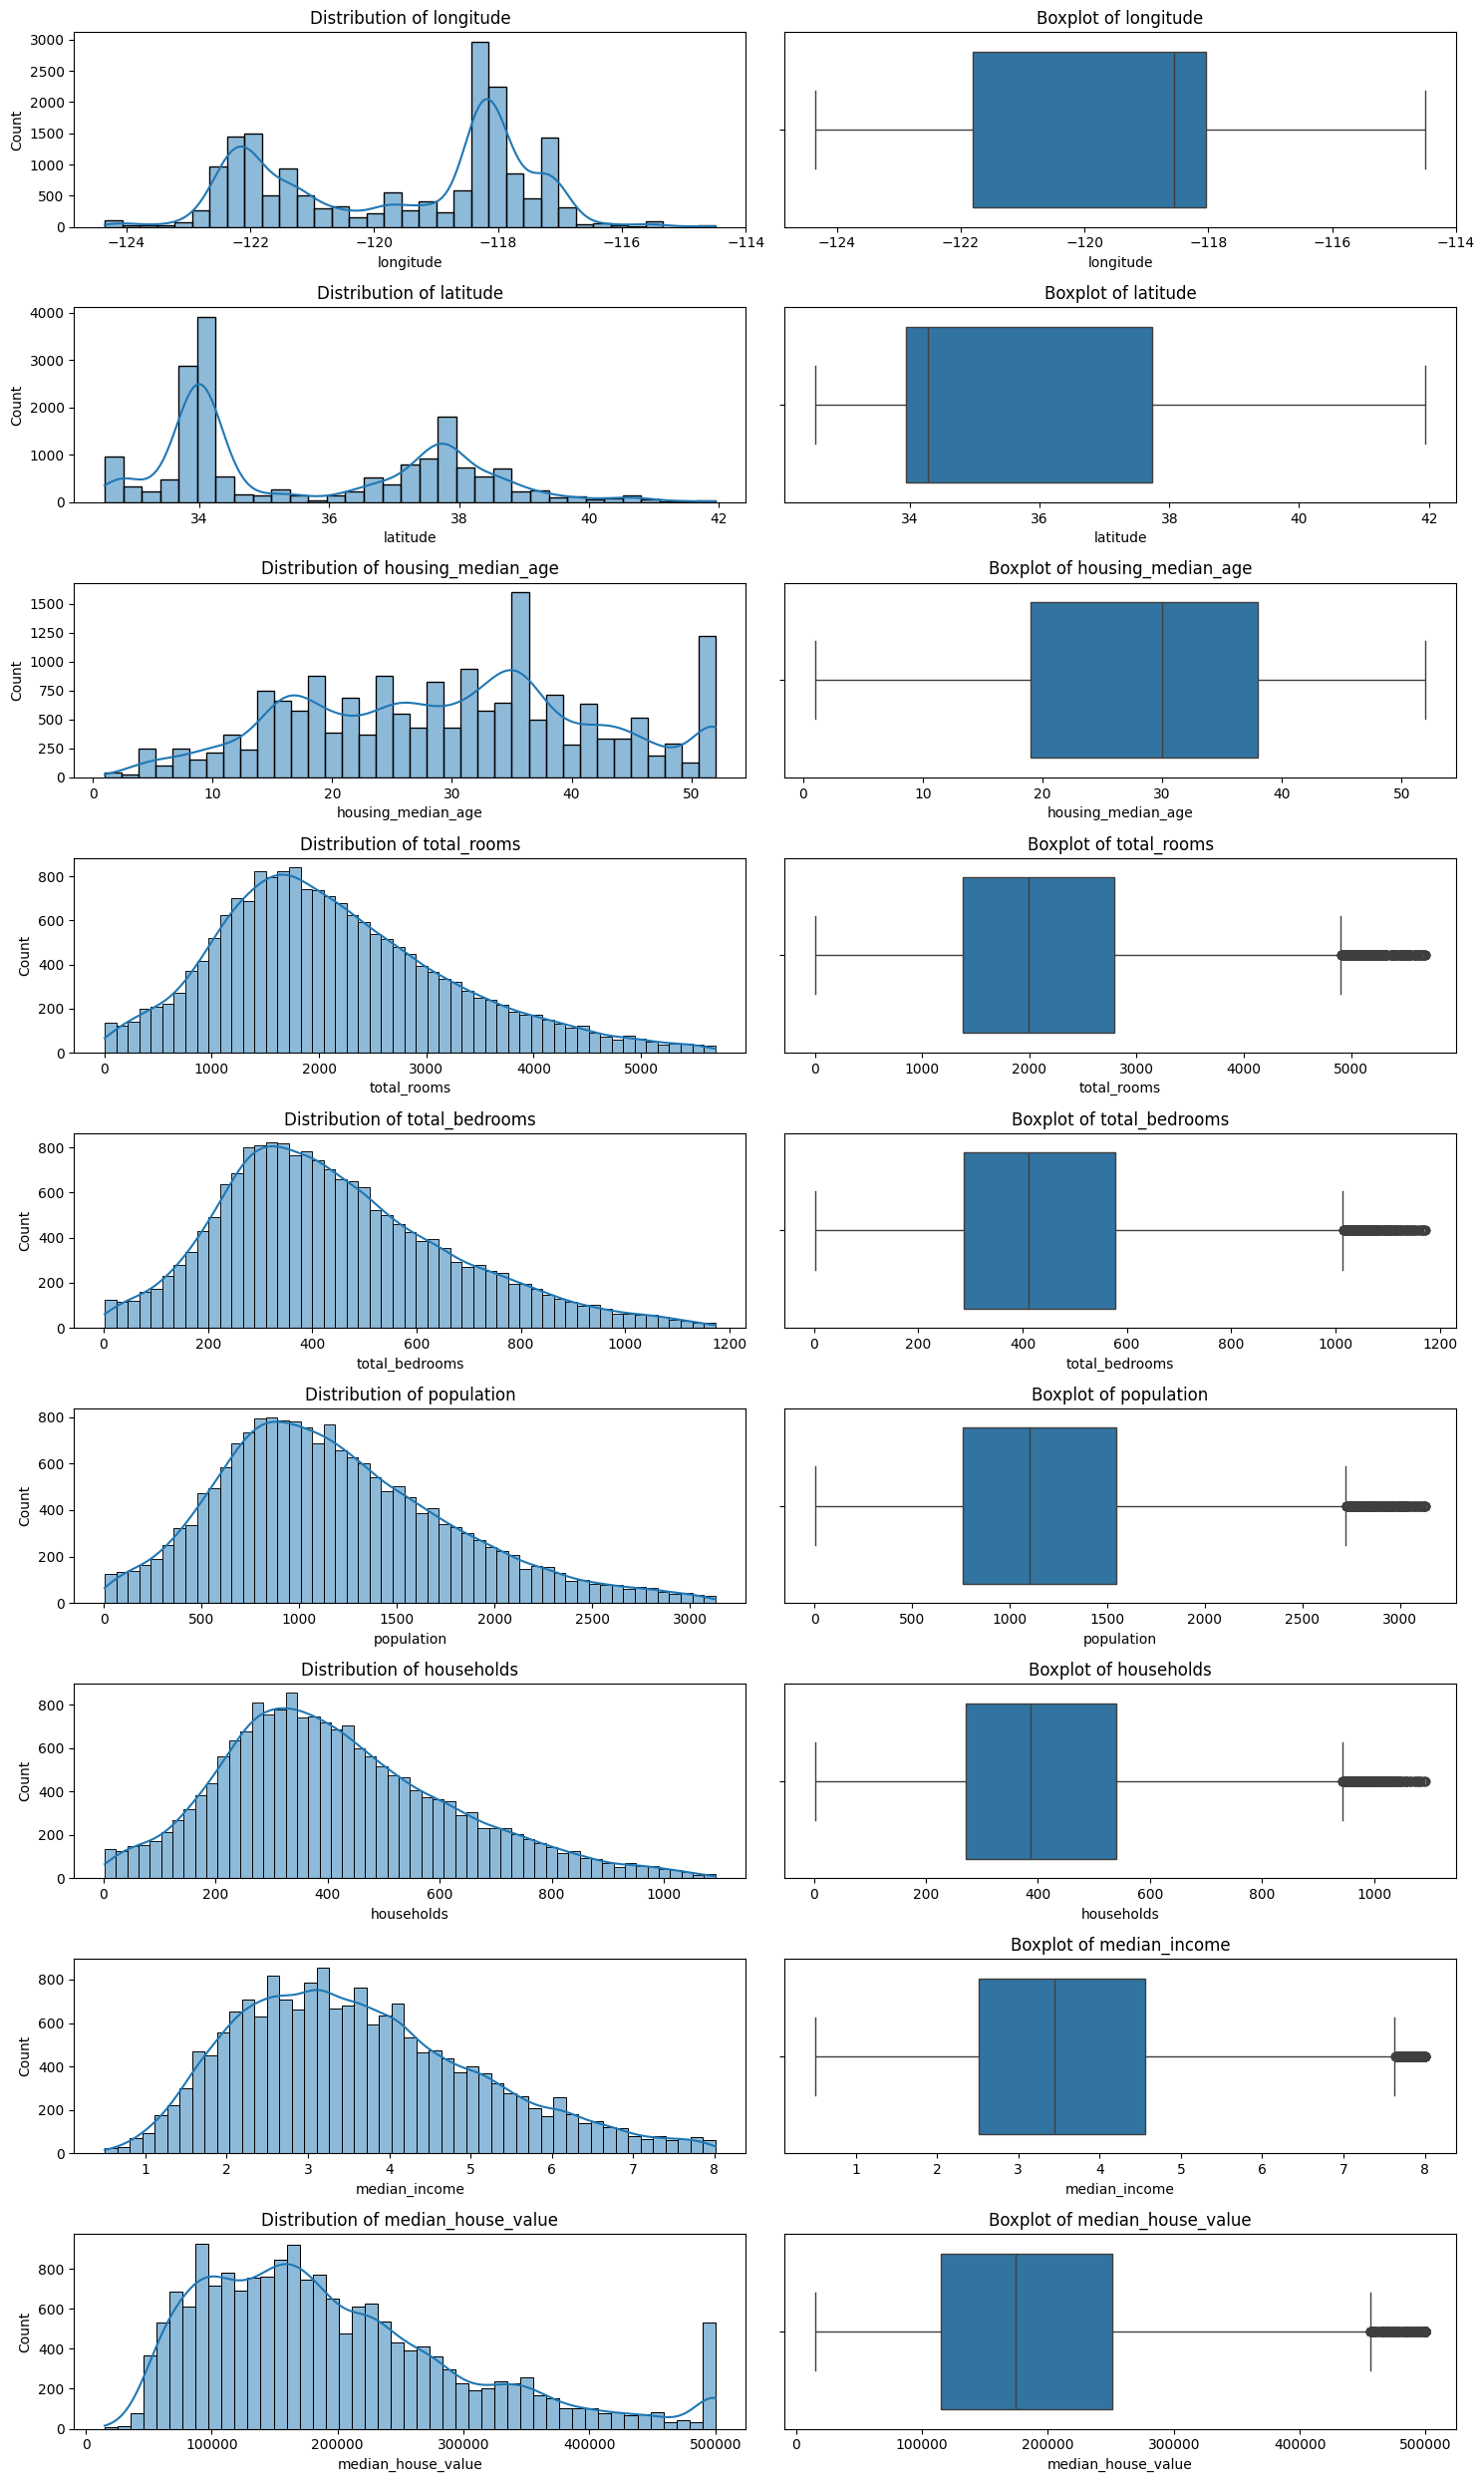

In [265]:
fig, axes = plt.subplots(9, 2, figsize=(15, 25))

# first feature
sns.histplot(Housing_Data_no_outliers['longitude'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of longitude')
sns.boxplot(x=Housing_Data_no_outliers['longitude'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of longitude')

# Second feature
sns.histplot(Housing_Data_no_outliers['latitude'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of latitude')
sns.boxplot(x=Housing_Data_no_outliers['latitude'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of latitude')

# Third feature
sns.histplot(Housing_Data_no_outliers['housing_median_age'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of housing_median_age')
sns.boxplot(x=Housing_Data_no_outliers['housing_median_age'], ax=axes[2, 1])
axes[2, 1].set_title('Boxplot of housing_median_age')

# Fourth feature
sns.histplot(Housing_Data_no_outliers['total_rooms'], kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Distribution of total_rooms')
sns.boxplot(x=Housing_Data_no_outliers['total_rooms'], ax=axes[3, 1])
axes[3, 1].set_title('Boxplot of total_rooms')

# Fifth feature
sns.histplot(Housing_Data_no_outliers['total_bedrooms'], kde=True, ax=axes[4, 0])
axes[4, 0].set_title('Distribution of total_bedrooms')
sns.boxplot(x=Housing_Data_no_outliers['total_bedrooms'], ax=axes[4, 1])
axes[4, 1].set_title('Boxplot of total_bedrooms')

# Sixth feature
sns.histplot(Housing_Data_no_outliers['population'], kde=True, ax=axes[5, 0])
axes[5, 0].set_title('Distribution of population')
sns.boxplot(x=Housing_Data_no_outliers['population'], ax=axes[5, 1])
axes[5, 1].set_title('Boxplot of population')

# Seventh feature
sns.histplot(Housing_Data_no_outliers['households'], kde=True, ax=axes[6, 0])
axes[6, 0].set_title('Distribution of households')
sns.boxplot(x=Housing_Data_no_outliers['households'], ax=axes[6, 1])
axes[6, 1].set_title('Boxplot of households')

# Eighth feature
sns.histplot(Housing_Data_no_outliers['median_income'], kde=True, ax=axes[7, 0])
sns.boxplot(x=Housing_Data_no_outliers['median_income'], ax=axes[7, 1])
axes[7, 1].set_title('Boxplot of median_income')

# Target
sns.histplot(Housing_Data_no_outliers['median_house_value'], kde=True, ax=axes[8, 0])
axes[8, 0].set_title('Distribution of median_house_value')
sns.boxplot(x=Housing_Data_no_outliers['median_house_value'], ax=axes[8, 1])
axes[8, 1].set_title('Boxplot of median_house_value')

plt.tight_layout() #is a function used to automatically adjust the spacing of subplots in a figure to prevent overlapping content.
plt.show()

### Data Transformation

#### Encoding

In [266]:
Encoded_Housing_Data = pd.get_dummies(Housing_Data_no_outliers, columns=['ocean_proximity'])
Encoded_Housing_Data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,False,False,False,True,False
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,False,False,False,True,False


<Axes: >

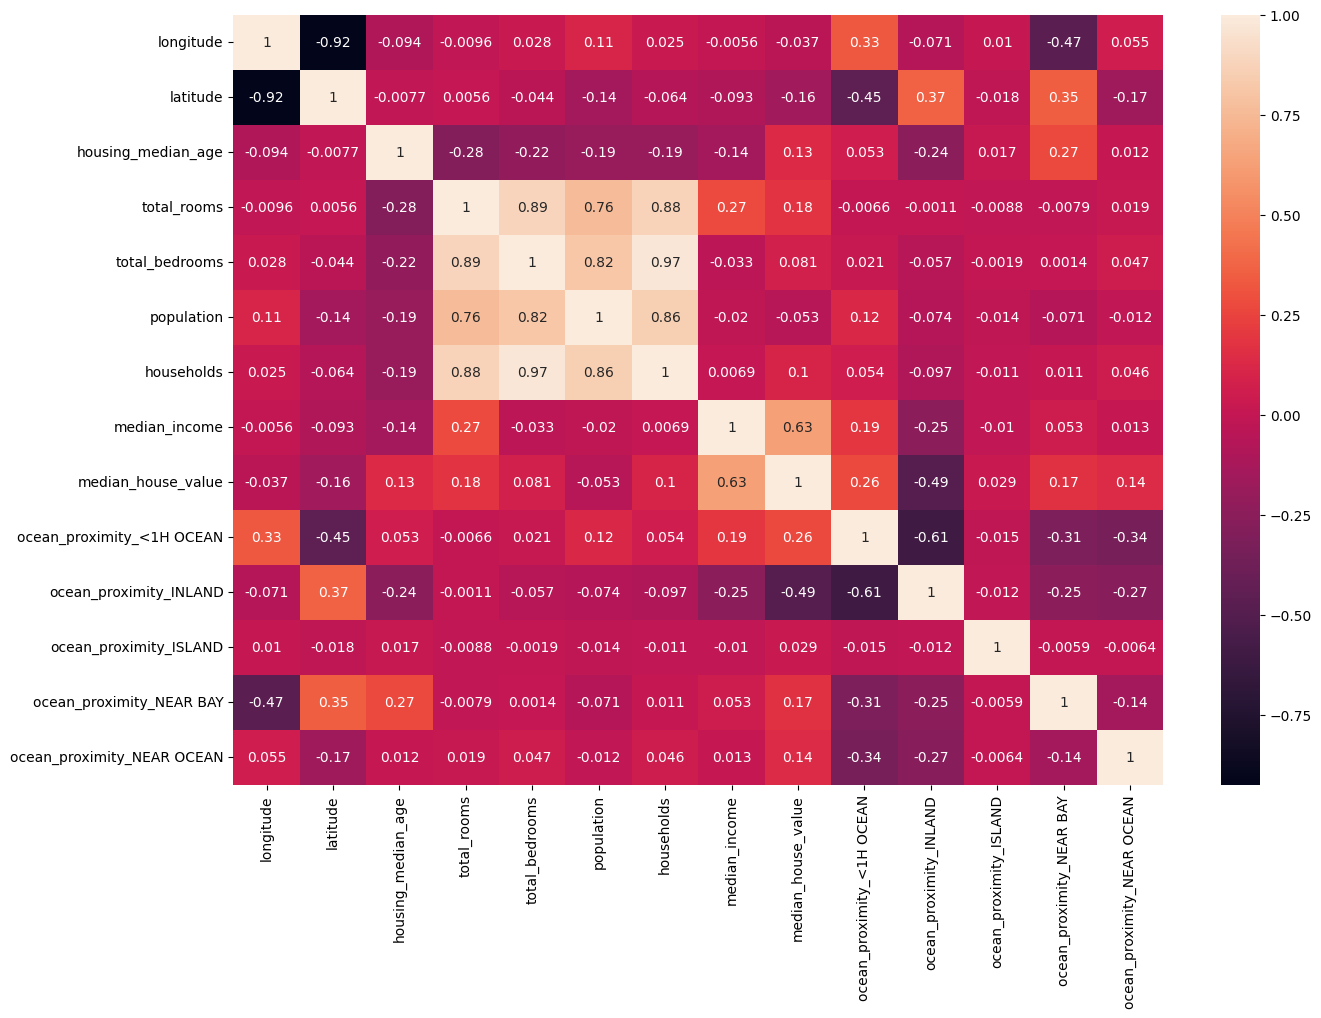

In [267]:
corr_matrix = Encoded_Housing_Data.corr()
plt.figure(figsize = (15,10))
sns.heatmap(data = corr_matrix, annot = True)

#### Scaling

In [268]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Encoded_Housing_Data.drop(columns = ['median_house_value']))

### Train Test Split

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Housing_Data_no_outliers['median_house_value'], test_size=0.2, random_state=42)

## Training 

In [270]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [271]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [272]:
print("Training Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("Testing Mean Squared Error:", mean_squared_error(y_test, y_test_pred))

Training Mean Squared Error: 4390272593.331369
Testing Mean Squared Error: 4281850655.012402


In [273]:
model.score(X_train, y_train)

0.6161463346576186

In [274]:
model.score(X_test, y_test)

0.6262972942789908